# Customer Churn Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv("C:\\Users\\gauri\\Downloads\\Churn_Modelling.csv")

In [3]:
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dt.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
dt.shape

(10000, 14)

In [6]:
dt.size

140000

In [7]:
dt.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
dt.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
dt[dt.duplicated(subset=['CustomerId'],keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
dt.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited', ylabel='count'>

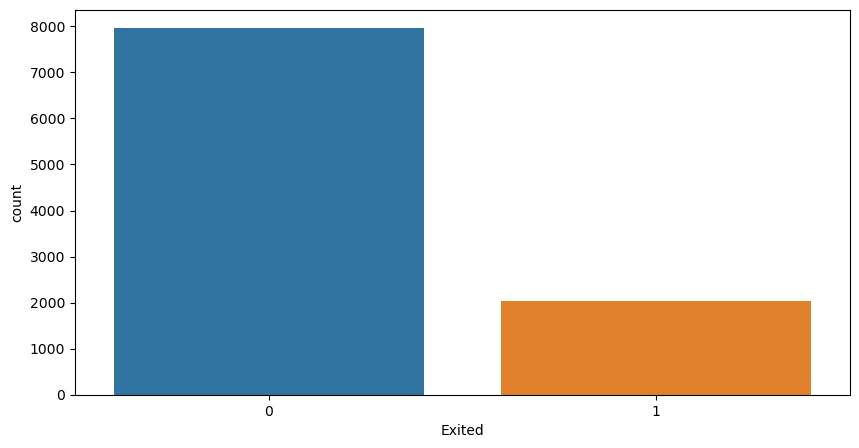

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=dt,x='Exited')

In [13]:
dt['Exited'].value_counts().to_frame()

,count
Exited,
0,7963
1,2037


In [14]:
from sklearn.utils import resample
churn_majority=dt[dt['Exited']==0]
churn_minority=dt[dt['Exited']==1]
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [15]:
churn_df['Exited'].value_counts().to_frame()

,count
Exited,
0,2037
1,2037


<Axes: xlabel='Exited', ylabel='count'>

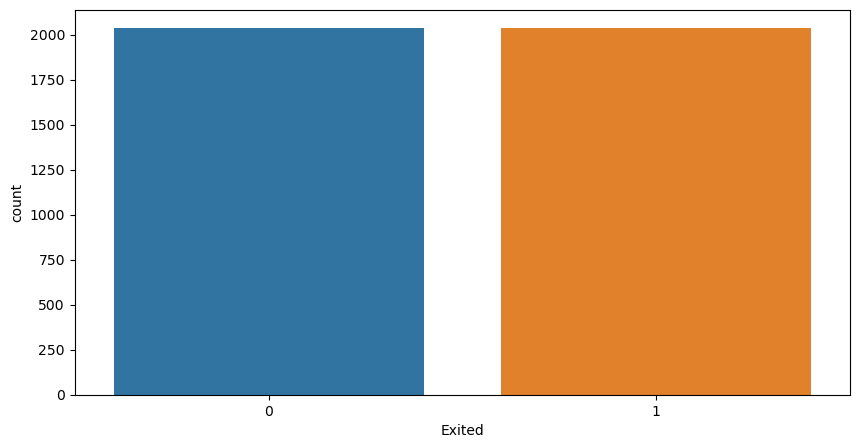

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=churn_df,x='Exited')

In [17]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,8166,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
6409,6410,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2157,2158,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
1618,1619,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
1633,1634,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [18]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
churn_df.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1,inplace=True)

In [20]:
churn_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
Age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
Tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
Balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
NumOfProducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
HasCrCard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
IsActiveMember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
EstimatedSalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
Exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

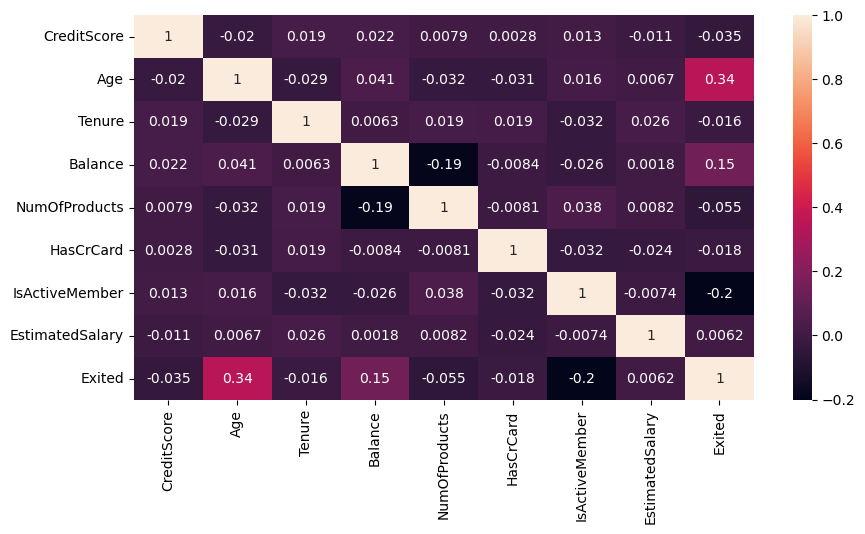

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(churn_df.corr(),annot=True)

In [22]:
from sklearn.model_selection import train_test_split
x=churn_df.drop(['Exited'],axis=1)
y=churn_df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3055, 8), (1019, 8), (3055,), (1019,))

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)

0.6457311089303238

In [24]:
y_pred=lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6484907497565726

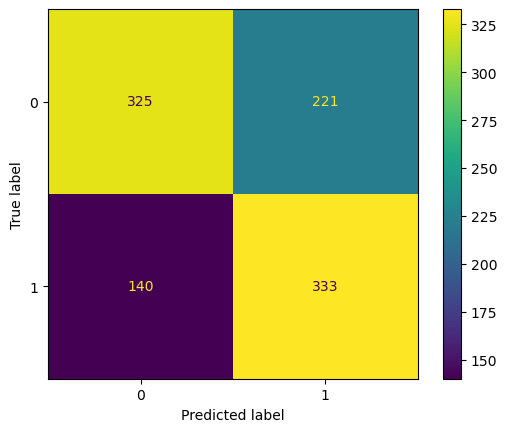

In [26]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [27]:
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l1',cv=3,Cs=10)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)
y_pred=lr.predict(x_test)
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6878198567041967

In [28]:
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l2',cv=4,Cs=10)

In [29]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)

0.6496565260058881

In [30]:
y_pred=lr.predict(x_test)

In [31]:
precision_score(y_test,y_pred)

0.6054545454545455

In [32]:
recall_score(y_test,y_pred)

0.7040169133192389

In [33]:
accuracy_score(y_test,y_pred)

0.6496565260058881

In [34]:
f1_score(y_test,y_pred)

0.6510263929618769

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.7669394435351882

In [36]:
knn.score(x_test,y_test)

0.5269872423945045

In [37]:
y_pred=lr.predict(x_test)

In [38]:
precision_score(y_test,y_pred)

0.6054545454545455

In [39]:
recall_score(y_test,y_pred)

0.7040169133192389

In [40]:
accuracy_score(y_test,y_pred)

0.6496565260058881

In [41]:
f1_score(y_test,y_pred)

0.6510263929618769

In [42]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss=StandardScaler()

In [45]:
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

In [46]:
knn.fit(x_train_ss,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [47]:
knn.score(x_train_ss,y_train)

0.8454991816693944

In [48]:
knn.score(x_test_ss,y_test)

0.7203140333660452

In [49]:
y_pred=knn.predict(x_test_ss)

In [50]:
precision_score(y_test,y_pred)

0.6991525423728814

In [51]:
recall_score(y_test,y_pred)

0.6976744186046512

In [52]:
accuracy_score(y_test,y_pred)

0.7203140333660452

In [53]:
f1_score(y_test,y_pred)

0.6984126984126985

In [54]:
from sklearn.svm import SVC

In [55]:
svc=SVC(kernel='rbf',gamma=2,C=1)

In [56]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=2)

In [57]:
svc.score(x_train,y_train)

1.0

In [58]:
svc.score(x_test,y_test)

0.46418056918547596

In [59]:
y_pred=knn.predict(x_test_ss)

In [60]:
precision_score(y_test,y_pred)

0.6991525423728814

In [61]:
recall_score(y_test,y_pred)

0.6976744186046512

In [62]:
accuracy_score(y_test,y_pred)

0.7203140333660452

In [63]:
f1_score(y_test,y_pred)

0.6984126984126985